# PCA USING Spotipy Web API

Files to be installed:

pip install spotipy

pip install plotly

pip install chart_studio

In [1]:
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import plotly.express as px
import math
%matplotlib inline

In [2]:
client_id = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"         #private
client_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"     #private


client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)

sp_query = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Set up query with credentials
sp = spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials(
            client_id=client_id,
            client_secret=client_secret))
#https://open.spotify.com/playlist/37i9dQZF1DX0XUsuxWHRQd?si=c716671d568140a8

url_pop = 'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M'
url_rnb = 'spotify:playlist:37i9dQZF1DX0XUsuxWHRQd'

## Analyse Playlist Function

In [3]:
def analyse_playlist(url, count):
    """Retrieves all songs from an identified playlist, and takes the ID, song, album, artist 
    and puts this all into a DataFrame"""

   # SONG NAMES

    offset = 0
    name = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.name,total'])

        name.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    name_list = [b["track"]["name"] for a in name for b in a]
    len(name_list)
    
    

    # ALBUM

    offset=0
    album = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.album.name,total'])

        album.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    album_list = [b["track"]["album"]["name"] for a in album for b in a]

    
    
   # ARTIST

    offset=0
    artist = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.album.artists.name,total'])

        artist.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    artist_list = [b["track"]["album"]["artists"][0]["name"] for a in artist for b in a]

    
    # ID
    
    offset = 0
    identifier = []

    while True:
        response = sp.playlist_tracks(url,
                                      offset=offset,
                                      fields=['items.track.id,total'])

        identifier.append(response["items"])
        offset = offset + len(response['items'])
        
        if len(response['items']) == 0:
            break

    identifier_list= [b["track"]["id"] for a in identifier for b in a]
    len(identifier_list)

    #Get audio features
    features = [sp.audio_features(identifier) for identifier in identifier_list]
    
    # Get each invidividual feature
    danceability = [(b["danceability"]) for a in features for b in a]    
    mode = [(b["mode"]) for a in features for b in a]
    energy = [(b["energy"]) for a in features for b in a]
    key = [(b["key"]) for a in features for b in a]        
    loudness = [(b["loudness"]) for a in features for b in a]       
    speechiness = [(b["speechiness"]) for a in features for b in a]
    acousticness = [(b["acousticness"]) for a in features for b in a]        
    instrumentalness = [(b["instrumentalness"]) for a in features for b in a] 
    liveness = [(b["liveness"]) for a in features for b in a]
    valence = [(b["valence"]) for a in features for b in a]        
    tempo = [(b["tempo"]) for a in features for b in a] 
    duration_ms = [(b["duration_ms"]) for a in features for b in a] 
    identifier_ = [(b["id"]) for a in features for b in a] 
    
    ## DataFrame (saved with current time)

    df = pd.DataFrame({"Song name": name_list, "Artist": artist_list, "Album": album_list, "ID": identifier_list})
    df_2 = pd.DataFrame({"Danceability":danceability,
                         "Mode":mode,
                         "Energy":energy,
                         "Key":key,
                         "Loudness":loudness,
                         "Speechiness":speechiness,
                         "Acousticness":acousticness,
                         "Instrumentalness":instrumentalness,
                         "Liveness":liveness,
                         "Valence":valence,
                         "Tempo":tempo,
                         "Duration (ms)": duration_ms,
                         "ID_CHECK":identifier_
                               })

    df_combined = df_2.join(df)
    
    df_combined.to_excel("file" + str(count) + ".xlsx")

    return df_combined.tail()

In [10]:
analyse_playlist(url_pop, "pop")

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at:

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),ID_CHECK,Song name,Artist,Album,ID
45,0.663,0,0.251,6,-9.870,0.0435,0.88000,0.000000,0.0932,0.528,90.272,215000,4VtRHZ4tBDHaWltVAytlLY,Go,Cat Burns,Go,4VtRHZ4tBDHaWltVAytlLY
46,0.603,1,0.473,5,-7.230,0.0511,0.61600,0.000000,0.3100,0.446,109.494,175345,5S9Zs5g9lTWnLIboN1pdlU,Fingers Crossed,Lauren Spencer-Smith,Fingers Crossed,5S9Zs5g9lTWnLIboN1pdlU
47,0.783,1,0.750,5,-5.762,0.0780,0.42600,0.000000,0.2410,0.880,97.953,140665,6Jrdb6CFOJEGaHjaa6c4WR,IDGAF (with blackbear),BoyWithUke,IDGAF,6Jrdb6CFOJEGaHjaa6c4WR
48,0.831,0,0.554,1,-9.998,0.2180,0.16100,0.000061,0.1520,0.396,140.026,168228,7hU3IHwjX150XLoTVmjD0q,MONEY,LISA,LALISA,7hU3IHwjX150XLoTVmjD0q
49,0.762,1,0.766,7,-3.955,0.0343,0.00776,0.000070,0.1280,0.442,130.001,287120,5fwSHlTEWpluwOM0Sxnh5k,Pepas,Farruko,Pepas,5fwSHlTEWpluwOM0Sxnh5k


In [11]:
analyse_playlist(url_rnb, "rnb")

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at:

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms),ID_CHECK,Song name,Artist,Album,ID
45,0.625,1,0.542,9,-4.365,0.2660,0.0223,0.000000,0.3770,0.328,152.403,209315,5QNW6Vx14N4OfJ7D0eDg0d,Neck & Wrist (feat. JAY-Z & Pharrell),Pusha T,Neck & Wrist,5QNW6Vx14N4OfJ7D0eDg0d
46,0.708,1,0.830,7,-5.676,0.2820,0.3560,0.000000,0.7490,0.595,118.495,309323,1BzXvBpIFWJgu0P8P6xmP4,Stick (with JID & J. Cole feat. Kenny Mason & ...,Dreamville,D-Day: A Gangsta Grillz Mixtape,1BzXvBpIFWJgu0P8P6xmP4
47,0.660,1,0.831,6,-5.356,0.0460,0.1740,0.000001,0.1630,0.615,82.985,193800,3hdaeIlrACjMK5FnahqrLG,Soccer Dad,ScHoolboy Q,Soccer Dad,3hdaeIlrACjMK5FnahqrLG
48,0.790,0,0.576,10,-6.991,0.0923,0.2720,0.000000,0.0925,0.574,103.011,179674,5Z3mR4zAX4K3krt4JAOpmx,LEMONADE,Vince Staples,RAMONA PARK BROKE MY HEART,5Z3mR4zAX4K3krt4JAOpmx
49,0.890,0,0.719,1,-8.243,0.2700,0.6510,0.000000,0.2000,0.850,112.990,135929,0aRdS1yGIgzIMhpVYHkp6l,Lifetime,Tyga,Lifetime,0aRdS1yGIgzIMhpVYHkp6l


## Data Visualization

### Histograms

In [4]:
def plot_figures(excel_file, colour):
    """Takes data from an excel file and plots histogram in subplots"""

    # Read excel file and put into DataFrame

    df = pd.read_excel(excel_file, index_col=0)

    # Initiate plot
    
    plt.figure(1,figsize=(30,25))
    
    # Create subplots for each column in the excel file

    plt.subplot(4,3,1)
    sns.distplot(df["Danceability"], color=colour)

    plt.subplot(4,3,2)
    sns.distplot(df["Energy"], color=colour)

    plt.subplot(4,3,3)
    sns.distplot(df["Tempo"], color=colour)

    plt.subplot(4,3,4)
    sns.distplot(df["Loudness"], color=colour)

    plt.subplot(4,3,5)
    sns.distplot(df["Speechiness"], color=colour)

    plt.subplot(4,3,6)
    sns.distplot(df["Acousticness"], color=colour)

    plt.subplot(4,3,7)
    sns.distplot(df["Instrumentalness"], color=colour)

    plt.subplot(4,3,8)
    sns.distplot(df["Liveness"], color=colour)

    plt.subplot(4,3,9)
    sns.distplot(df["Valence"], color=colour)

    plt.subplot(4,3,10)
    sns.distplot(df["Duration (ms)"], color=colour)

    plt.subplot(4,3,11)
    sns.distplot(df["Key"], color=colour)

    plt.subplot(4,3,12)
    sns.distplot(df["Mode"], color=colour)



C:\Users\hseit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hseit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hseit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

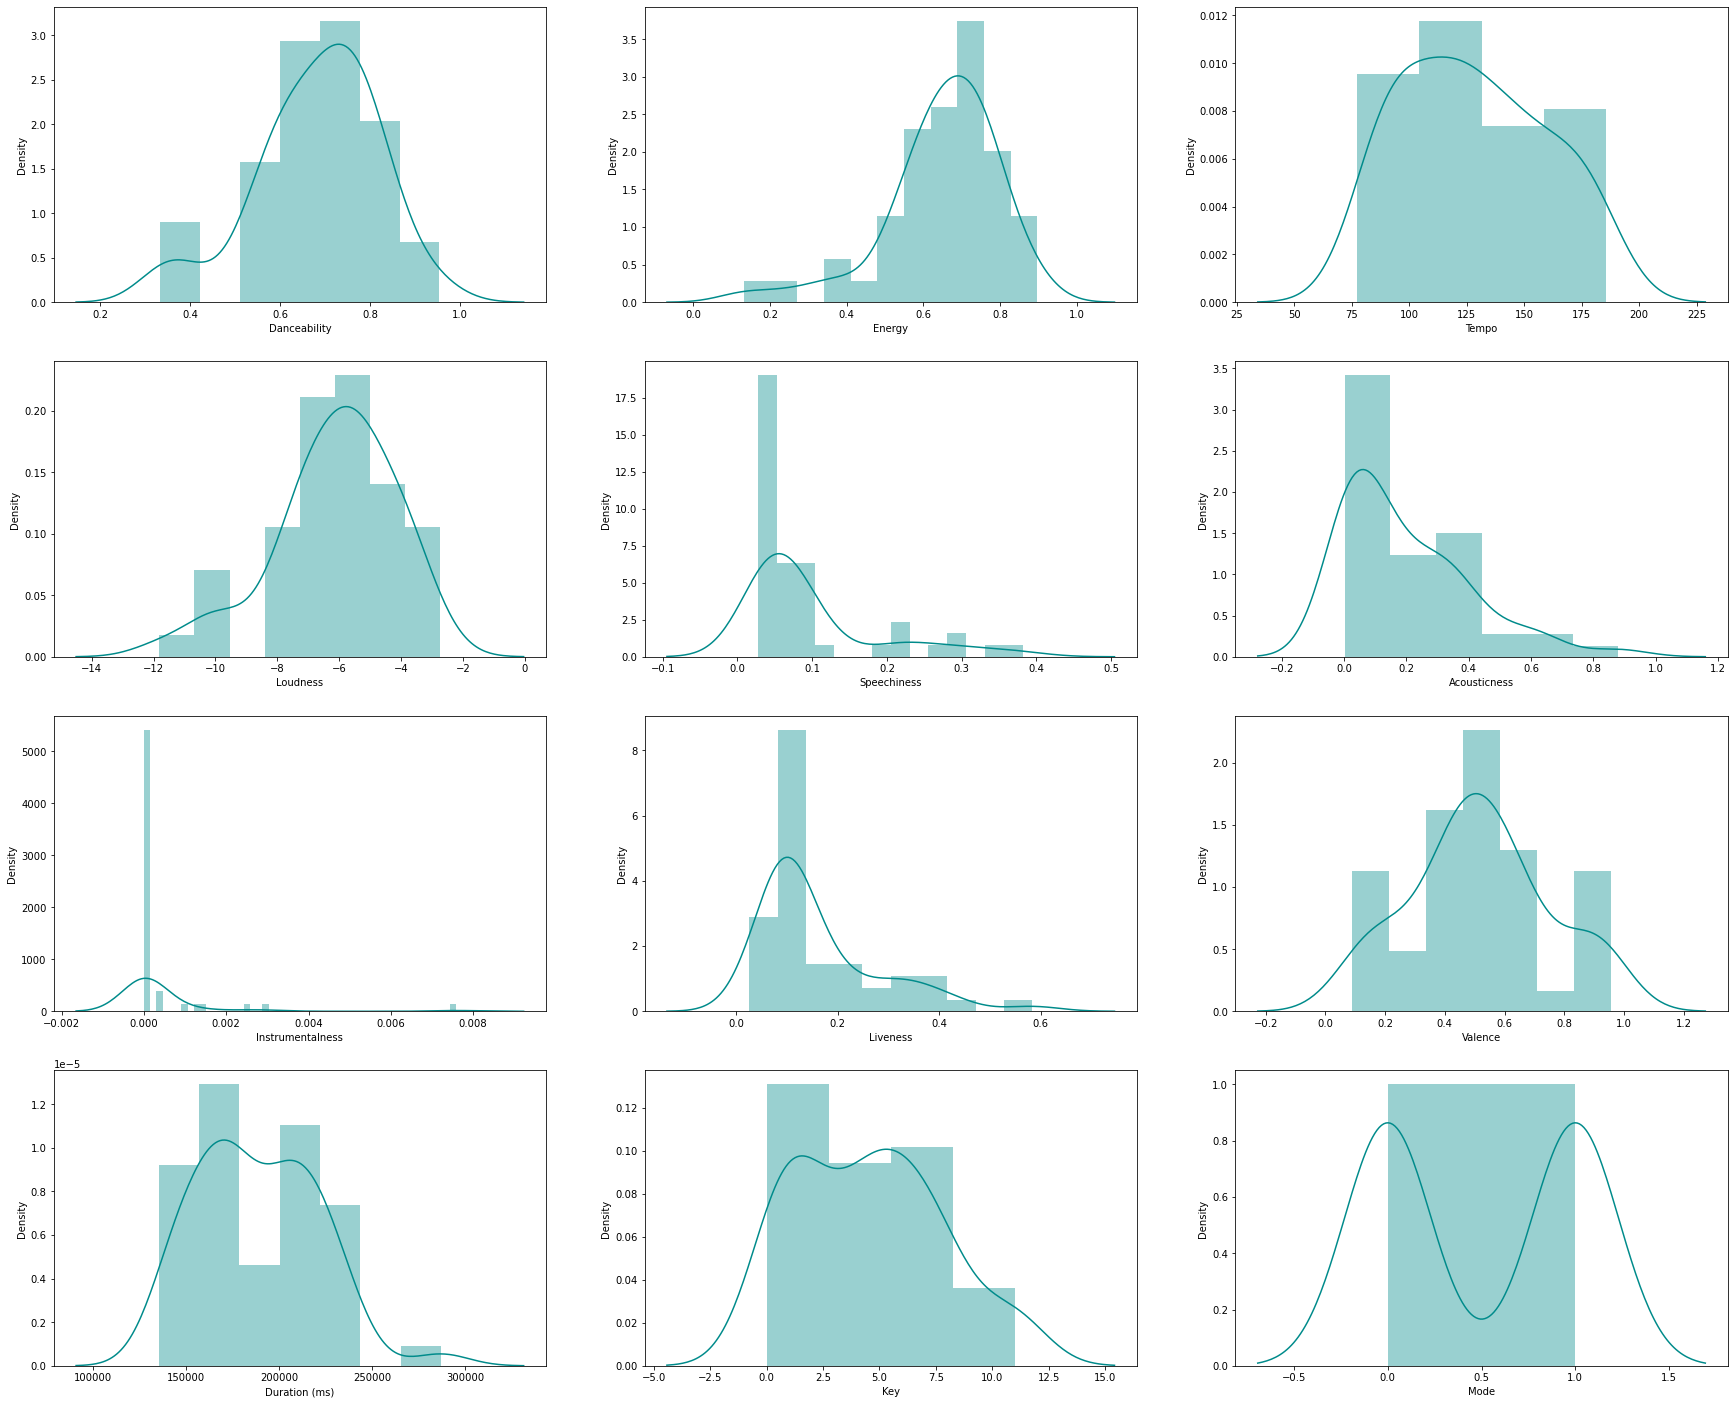

In [5]:
plot_figures("filepop.xlsx", colour="darkcyan")

C:\Users\hseit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hseit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hseit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

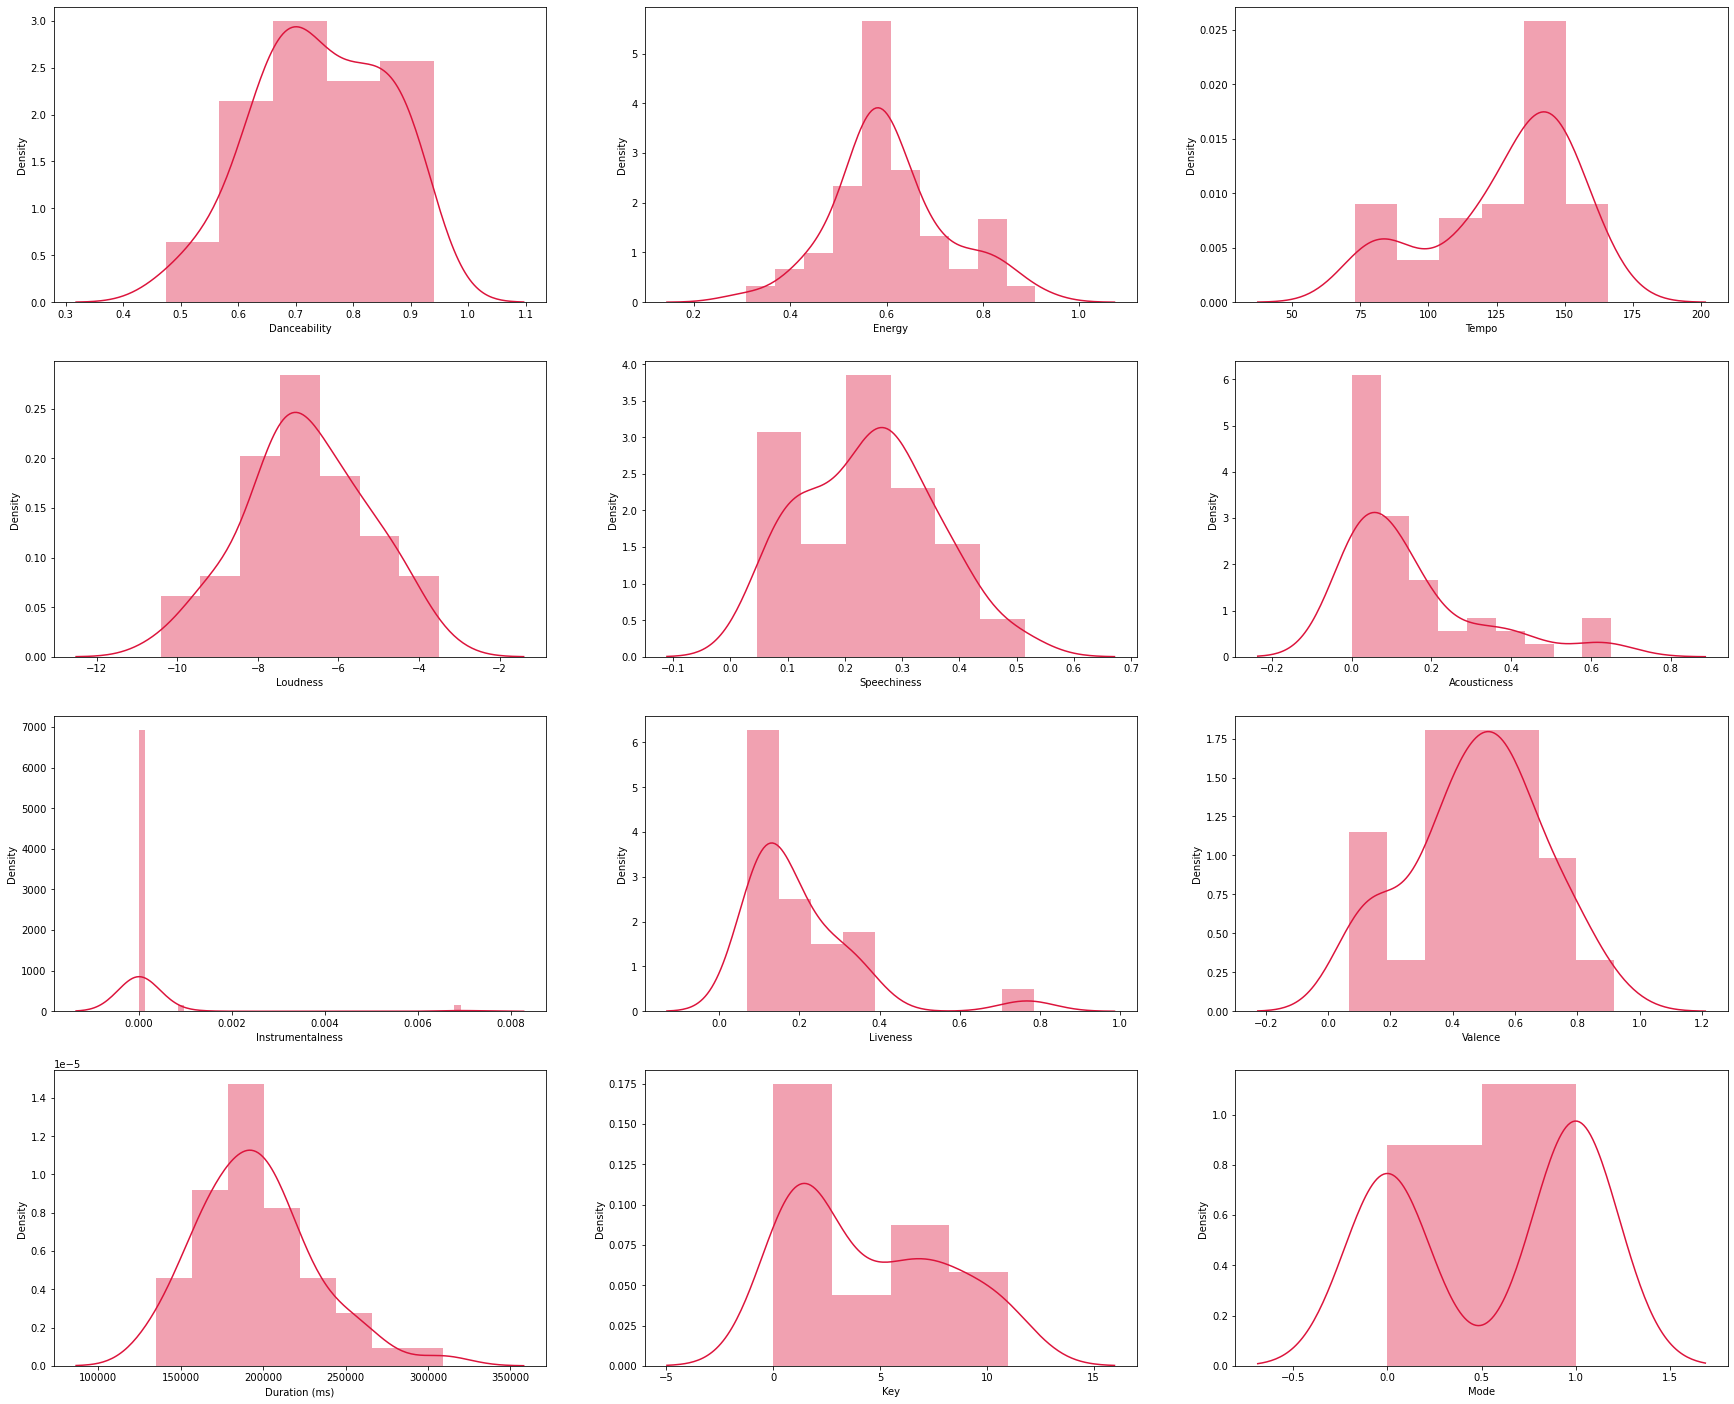

In [6]:
plot_figures("filernb.xlsx",colour="crimson")

### Radar Charts

In [18]:
def plot_radar_chart(excel_file):
    """Takes data from excel file and scales the values so that they all lie between zero and 1.
    Then plots a radar chart."""

    df = pd.read_excel(excel_file, index_col = 0)
    #or df = pd.read_excel(excel_file)
    
    # Get the specific columns
    radar = df.loc[:,"Danceability":"Duration (ms)"]

    # Create another df for our altered values (scale all values between 0 and 1)
    df_z = radar
    df_z["Key"] = (df["Key"] / df["Key"].max())
    df_z["Duration (ms)"] = (df["Duration (ms)"] / df["Duration (ms)"].max())
    df_z["Tempo"] = (df["Tempo"] / df["Tempo"].max())
    df_z["Loudness"] = (df["Loudness"] / df["Loudness"].min())

    # Prepare data for plotting with plotly.express
    labels = list(df_z.columns)

    values = df_z.mean().values

    df_radar = pd.DataFrame(dict(r=values, theta=labels))

    fig = px.line_polar(df_radar, r="r", theta="theta", line_close=True)

    fig.update_traces(fill="toself")
    fig.show()
    return df_radar

In [74]:
pop_radar = plot_radar_chart("filepop.xlsx")

In [21]:
import chart_studio
#dummy user
username = "nathanwthomas"
api_key = "uvANTAtOVDTGEp7G8SM3"

chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls

In [73]:
rnb_radar = plot_radar_chart("filernb.xlsx")

## PCA Decomposition

In [27]:
def PCA(excel_file):

    from sklearn.decomposition import PCA

    df = pd.read_excel(excel_file, index_col=0)

    df_scaled = pd.DataFrame()

    for col in df.loc[:,"Danceability":"Duration (ms)"]:
        df_scaled[col] = (df[col] - df[col].mean() / df[col].std())

    df_scaled


    # Initialize PCA
    pca = PCA(n_components = len(df_scaled.columns))

    # Fit PCA
    pca_series = pca.fit_transform(df_scaled).T

    df_pca = pd.DataFrame({"PC1":pca_series[0], "PC2":pca_series[1]})
    print(df_pca)
    df_pca.to_excel("DF_PCA_" + f'{excel_file}')

    explained_variance = pca.explained_variance_ratio_

    print("\n explained variance = {}".format(explained_variance))

    eigenvector_loadings = pca.singular_values_
    print("\n eigenvector_loadings = {}".format(eigenvector_loadings))



In [28]:
PCA("filepop.xlsx")

             PC1        PC2
0  -21068.046374  42.782603
1   17699.964679 -30.524424
2  -14423.036710 -23.196599
3  -35181.043434  20.847624
4  -44470.033805 -46.437802
5   50433.966444 -39.948605
6  -16104.042580  16.759242
7  -35371.047046  46.538145
8  -15744.036908 -22.346364
9  -14990.032278 -53.344036
10 -46565.045649  35.190515
11  19481.957860  15.835060
12   5434.965147 -35.230392
13  14363.961489  -9.824570
14 -40174.038514 -12.908533
15  13123.952393  53.813780
16  -3923.048334  57.148252
17  25604.954165  41.724458
18  23628.956519  25.442046
19  -2690.048034  55.533575
20 -19769.038915  -8.960512
21  12962.960505  -2.209050
22 -23552.038215 -13.567640
23  18400.955106  34.719307
24  49348.960507   0.974057
25 -53107.041694   7.385509
26 -42571.034369 -41.303724
27 -10168.046646  44.501132
28  36323.957593  19.233920
29  42669.960007   4.026998
30 -10223.045713  38.987260
31  37716.964518 -28.563860
32 -23106.037705 -17.350267
33  39628.963021 -17.369007
34  22188.959376   5

In [30]:
PCA("filernb.xlsx")

              PC1        PC2
0    18125.863726 -36.078740
1   -21902.141910  18.942933
2   -14457.138641 -13.391192
3     4620.855425  44.336418
4    10534.862191 -20.981316
5    45793.861498 -13.048030
6   -60586.138216 -21.235148
7     4149.860502  -6.752810
8     4697.854184  55.505675
9   -38854.144651  44.084488
10   -9994.136719 -32.854262
11   29682.863023 -29.272330
12  -14980.138814 -11.503678
13    4575.861791 -15.832245
14   -2370.139229  -9.231470
15  -35923.137211 -29.732514
16    9908.861096 -10.969440
17   18877.861719 -14.890324
18   -9312.137209 -28.955009
19   34087.854426  55.575190
20  -59583.144978  44.412356
21   30908.861686 -13.855695
22     807.860073  -2.066972
23   21964.859007  11.355999
24   -3093.139642  -1.094761
25    8435.855515  45.013145
26   54872.860329   1.892512
27  -27130.138752 -14.639249
28  -13781.141356  10.699774
29  -10637.140277   0.876179
30   74820.859963   5.875544
31  -10957.144149  38.375732
32  -27850.136637 -34.804100
33   30511.861

## Scatterplot

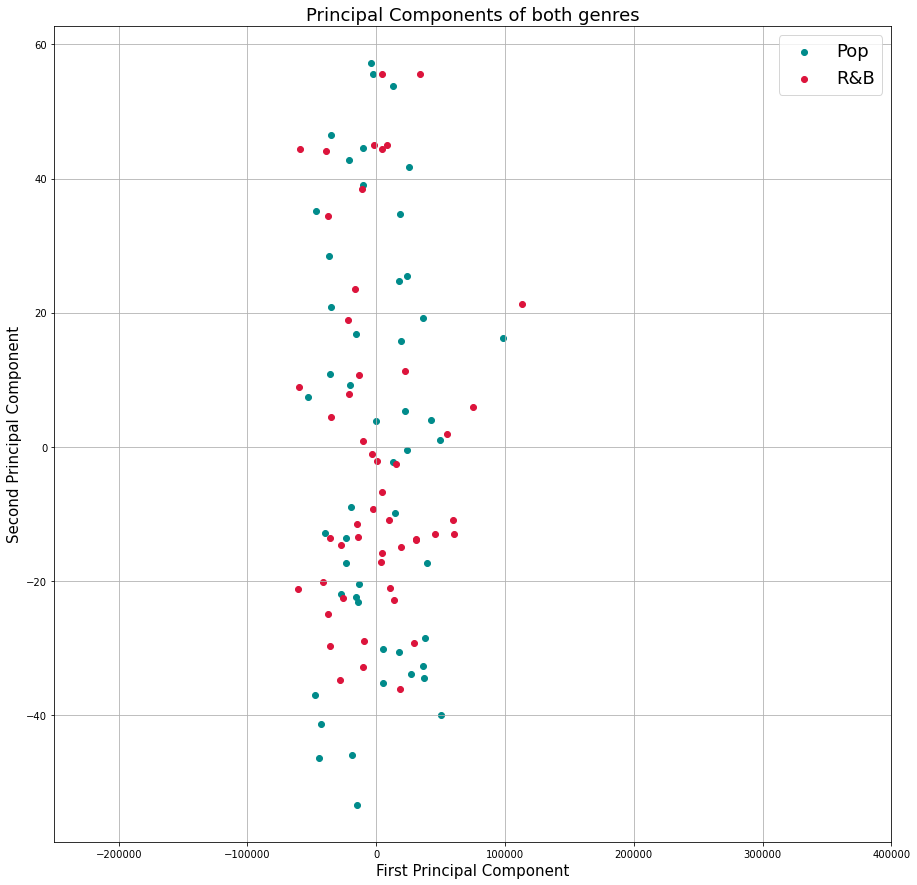

In [57]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

ax.set_xlabel("First Principal Component", fontsize=15)
ax.set_ylabel("Second Principal Component", fontsize=15)
ax.set_title("Principal Components of both genres", fontsize=18)

pop_components = pd.read_excel("DF_PCA_filepop.xlsx", index_col=0)
rnb_components = pd.read_excel("DF_PCA_filernb.xlsx", index_col=0)

ax = plt.scatter(x = pop_components["PC1"], y= pop_components["PC2"], label="Pop", color="darkcyan")
ax = plt.scatter(x = rnb_components["PC1"][:1861], y= rnb_components["PC2"][:1861], label="R&B", color="crimson")
plt.xlim(-250000,400000)

plt.grid(True)
plt.legend(prop = {"size":18}, loc="upper right")

## Perform KNN algorithm

In [58]:
# Label the class of each genre, pop = 0, rnb = 1
labelled_pop = pd.read_excel("filepop.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
labelled_rnb = pd.read_excel("filernb.xlsx", index_col=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
labelled_pop["Class"] = 0
labelled_rnb["Class"] = 1

# Combine to create a full dataframe
full_data = labelled_pop.append(labelled_rnb[:200], ignore_index=True) #1861

# Scale between 0 and 1
full_data["Key"] = (full_data["Key"] / full_data["Key"].max())
full_data["Tempo"] = (full_data["Tempo"] / full_data["Tempo"].max())
full_data["Loudness"] = (full_data["Loudness"] / full_data["Loudness"].min())

full_data_random = full_data.sample(frac=1)
full_data_random

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Class
56,0.684,1,0.545,0.090909,0.582783,0.1210,0.1590,0.000000,0.102,0.407,0.770211,1
3,0.604,1,0.741,0.181818,0.471559,0.0475,0.1780,0.000035,0.409,0.473,0.828889,0
8,0.824,0,0.764,0.454545,0.353394,0.0854,0.0888,0.002940,0.117,0.881,0.581488,0
54,0.647,0,0.581,0.363636,0.649907,0.0884,0.0029,0.000008,0.119,0.113,0.808439,1
20,0.695,1,0.540,0.363636,0.481801,0.0493,0.2990,0.000000,0.367,0.415,0.656512,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.677,1,0.558,0.727273,0.650161,0.1770,0.1670,0.000000,0.365,0.384,0.777943,1
65,0.824,1,0.577,0.181818,0.799306,0.3570,0.0109,0.000000,0.107,0.442,0.829610,1
29,0.808,0,0.897,1.000000,0.314203,0.0348,0.0469,0.000031,0.364,0.591,0.678555,0
39,0.742,0,0.527,0.727273,0.583376,0.0769,0.3270,0.000000,0.250,0.638,0.457521,0


### Training data

In [38]:
# Get x training data
x_train = full_data_random[0:3000]

# Target values
y_train = x_train["Class"].values

# Remove target values from x_data
x_train = x_train.drop("Class", axis=1)
x_train

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
13,0.796,1,0.798,0.090909,0.534281,0.0317,0.034000,0.000042,0.0952,0.9420,0.624745
37,0.647,0,0.581,0.363636,0.649907,0.0884,0.002900,0.000008,0.1190,0.1130,0.808439
16,0.410,0,0.611,0.363636,0.700102,0.0467,0.022800,0.000000,0.1160,0.0899,1.000000
73,0.801,0,0.794,0.545455,0.395632,0.3150,0.077100,0.000000,0.2040,0.7570,0.640962
95,0.625,1,0.542,0.818182,0.369477,0.2660,0.022300,0.000000,0.3770,0.3280,0.820575
...,...,...,...,...,...,...,...,...,...,...,...
45,0.663,0,0.251,0.545455,0.835449,0.0435,0.880000,0.000000,0.0932,0.5280,0.486047
76,0.644,0,0.671,1.000000,0.436431,0.3150,0.022500,0.000000,0.0855,0.5630,0.710726
21,0.814,1,0.628,0.636364,0.607584,0.2210,0.167000,0.000000,0.1010,0.6770,0.667523
68,0.676,1,0.610,0.090909,0.777467,0.2730,0.000114,0.000002,0.1910,0.5190,0.839969


### Fit the KNN model

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)

#cross_validate
cv_scores = cross_val_score(knn, x_train, y_train, cv=10)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))

[0.5 0.6 0.7 0.6 0.7 0.9 0.5 0.9 0.9 0.7] 

mean = 0.70


### Test Data

In [67]:
x_test = full_data_random[70:]

# Randomise the data
x_test = x_test.sample(frac=1)

y_test = x_test["Class"].values

x_test = x_test.drop("Class", axis=1)
x_test

,Danceability,Mode,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
31,0.843,0,0.700,0.363636,0.301591,0.0803,0.09340,0.000000,0.1400,0.899,0.506071
0,0.520,0,0.731,0.545455,0.451837,0.0557,0.34200,0.001010,0.3110,0.662,0.936482
21,0.814,1,0.628,0.636364,0.607584,0.2210,0.16700,0.000000,0.1010,0.677,0.667523
63,0.677,1,0.558,0.727273,0.650161,0.1770,0.16700,0.000000,0.3650,0.384,0.777943
28,0.604,1,0.366,0.454545,0.636448,0.0282,0.57800,0.000000,0.1330,0.130,0.764461
98,0.790,0,0.576,0.909091,0.591756,0.0923,0.27200,0.000000,0.0925,0.574,0.554637
37,0.647,0,0.581,0.363636,0.649907,0.0884,0.00290,0.000008,0.1190,0.113,0.808439
43,0.375,0,0.133,0.000000,0.899272,0.0352,0.65100,0.000000,0.0695,0.192,0.709218
29,0.808,0,0.897,1.000000,0.314203,0.0348,0.04690,0.000031,0.3640,0.591,0.678555
53,0.643,0,0.605,0.363636,0.505163,0.2970,0.03360,0.000000,0.1120,0.145,0.453440


In [68]:
predictions = knn.predict(x_test)
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [69]:
accuracy_score = knn.score(x_test, y_test)
print("Accuracy score = ""{:.2f}".format(accuracy_score))

Accuracy score = 0.73


In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[10,  6],
       [ 2, 12]], dtype=int64)

Reference:
    https://towardsdatascience.com/using-k-nearest-neighbours-to-predict-the-genre-of-spotify-tracks-796bbbad619f